In [1]:
%matplotlib inline
%precision 8
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Collaborators: Ananth Ravi Kumar

# HW 3: BVP Problems II

## Question 1 - 

Consider the $n \times n$ tridiagonal matrix of the form
$$A_\alpha = \begin{bmatrix}
\alpha & -1 \\
-1 & \alpha & -1 \\
& -1 & \alpha & -1 \\
& & \ddots & \ddots & \ddots \\
& & & -1 & \alpha & -1\\
& & & & -1 & \alpha\\
\end{bmatrix}$$
where $\alpha \in \mathbb{R}$.

**(a)** [10] Verify that the eigenvalues of $A_\alpha$ are
$$
    \lambda_j = \alpha - 2 \cos(j \theta), \quad j = 1, \ldots, n
$$
with
$$
    \theta = \frac{\pi}{n + 1},
$$
with the eigenvectors
$$
    v_j = [\sin (j \theta), \sin (2 j \theta), \ldots \sin (n \theta) ]^T.
$$
What conditions should we place on $\alpha$ such that the matrix $A_\alpha$ is positive definite?  *Hint:* Look up the Gershgorin Circle Theorem.

## Solution

$$ (A_\alpha v_j)_i = \alpha \sin(ij\theta) - \sin(i-1)j\theta - \sin(i+1)j\theta $$

$$ = \alpha \sin(ij\theta) - \big[ \sin(ij\theta)cos(j\theta) - cos(ij\theta)sin(j\theta) \big] - \big[ \sin(ij\theta)cos(j\theta) + cos(ij\theta)sin(j\theta) \big]$$

$$= \alpha \sin(ij\theta) - 2\sin(ij\theta)cos(j\theta) = (\alpha - 2\cos(j\theta))\sin(ij\theta)$$

$$ = (\lambda_j v_j)_i $$

From the Gershgorin circle theorem, the eigenvalues lie in the range $[\alpha - 2, \alpha + 2]$. So $\alpha > 2$ is needed so that $A_{\alpha}$ is positive definite.

**(b)** [5] How does this relate to the matrices we have been building for the Poisson problem?

## Solution

The matrices are the same, but only differ by scaling and the sign.

**(c)** [10]  Will the Jacobi method converge for this matrix?  You can do this analytically or with a computation.  Assume that we are solving the problem on the domain $\Omega = [0, 1]$ and boundary conditions $u(0) = u(1) = 0$ in terms of setting up the matrix.  Regardless of your analytical results show the convergence results for multiple values of $\alpha$.

## Solution

Yes, for $\alpha > 2$. 

Let $$M = \frac{\alpha}{\Delta x^2} I = D$$ and 

$$
N = \frac{1}{\Delta x^2} \begin{bmatrix}
        0 & 1 & \\
        1 & 0 & 1 \\
          & \ddots & \ddots & \ddots \\
          & & 1 & 0 & 1 \\
          & &   & 1 & 0 
          \end{bmatrix} 
$$ 
Then, we have that 

$$G = I - D^{-1}A \implies \rho(G) = \rho(I - D^{-1}A) $$


From part (a) we know that $\lambda_j = \alpha - 2\cos(j\theta)$. Let the eigenvalues of $G$ be $\mu_j$; then we have that 

$$\mu_j = 1 - \frac{1}{\alpha}(\alpha - 2\cos(j\theta)) = \frac{2}{\alpha}\cos(j\theta) $$

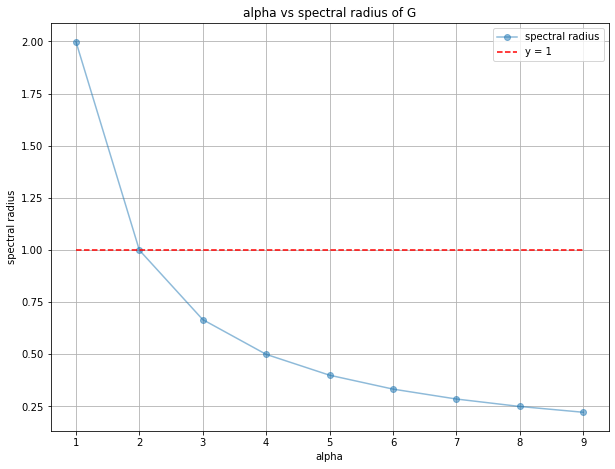

In [2]:
# YOUR CODE HERE
m=100
a=0
b=1
r = []
k = []
alphas = numpy.arange(1, 10, 1)

for i in alphas:

    xvals = numpy.linspace(a, b, m)
    delta_x = (b - a)/(m + 1)
    diagonal = numpy.ones(m)
    
    A = numpy.zeros((m, m))
    A += numpy.diag(diagonal, 0) * i 
    A += numpy.diag(-diagonal[:-1], 1)
    A += numpy.diag(-diagonal[:-1], -1)
    A *= 1/delta_x ** 2
    
    M_inv = delta_x ** 2 / i * numpy.eye(m)
    G = numpy.eye(m) - numpy.dot(M_inv, A)
    rho_G = numpy.max(numpy.abs(numpy.linalg.eigvals(G)))
    r.append(rho_G)
    k.append(numpy.linalg.cond(A))
    
plt.figure(figsize=(10, 7.5))
plt.plot(alphas, r, label='spectral radius', alpha=0.5, marker='o')
plt.plot(alphas, numpy.ones(len(alphas)),'r--', label='y = 1')
plt.grid() 
plt.title("alpha vs spectral radius of G")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("spectral radius")
plt.show()

**(d)** [10]  Repeat the same from part (c) with the Gauss-Seidel method.

## Solution

Our $G$ is given by:

$$G = M^{-1}N = (L + D)^{-1}U $$

and also converges when $\alpha >2$

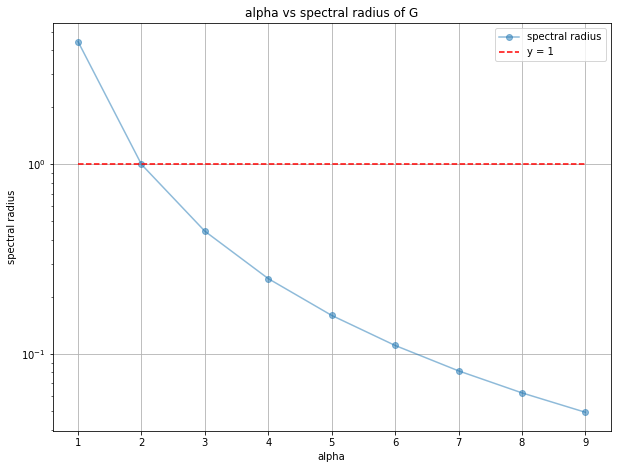

In [3]:
# YOUR CODE HERE
alphas = numpy.arange(1, 10, 1)
r = []
k = []

for i in alphas:
    # construct G matrix. 
    xvals = numpy.linspace(a, b, m)
    delta_x = (b - a)/(m + 1)
    diagonal = numpy.ones(m)
    A = numpy.zeros((m, m))
    
    L = A + numpy.diag(-diagonal[:-1], -1) / delta_x ** 2 
    D = A + numpy.diag(diagonal, 0) * i / delta_x ** 2
    U = A + numpy.diag(diagonal[:-1], 1) / delta_x ** 2
    G = numpy.dot(numpy.linalg.inv(L+D), U)
    rho_G = numpy.max(numpy.abs(numpy.linalg.eigvals(G)))
    r.append(rho_G)
    k.append(numpy.linalg.cond(L + D - U))
    
plt.figure(figsize=(10, 7.5))
plt.semilogy(alphas, r, label='spectral radius', alpha=0.5, marker='o')
plt.plot(alphas, numpy.ones(len(alphas)),'r--', label='y = 1')
plt.grid() 
plt.title("alpha vs spectral radius of G")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("spectral radius")
plt.show()

**(e)** [15]  For SOR we also have the value of $\omega$ to consider.  Pick a value of $\alpha$ you expect to converge (other than $\alpha = w$) and computationally find the optimal value of $\omega$.  Justify your conclusion with a plot and use a numerical method to find the optimum.

## Solution

From the previous results, we know that we require $\alpha>2$ for $A$ to not be ill-conditioned. Suppose $\alpha=7$, then:

$$ M = \frac{1}{\omega} (D - \omega L) $$ 

$$ N = \frac{1}{\omega} ((1-\omega)D + \omega U)$$

Then:

$M - N = D - L - U$ with $M - N = A$.

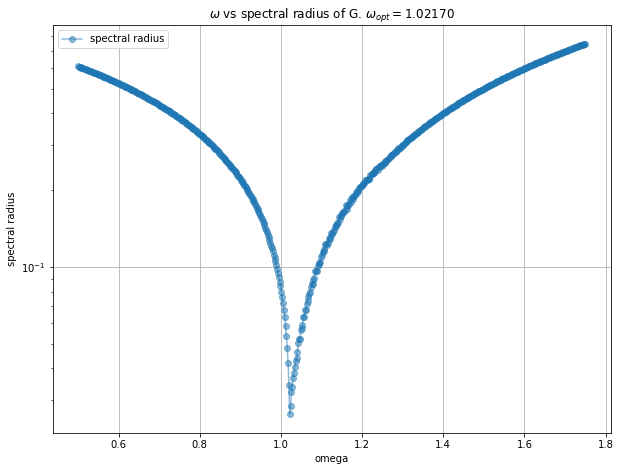

In [4]:
# YOUR CODE HERE
omegas = numpy.linspace(0.5, 1.75, 600)
alpha = 7
a = 0
b = 1
u_a = 0
u_b = 0
m = 100

xvals = numpy.linspace(a, b, m)
delta_x = (b - a)/(m + 1)
diagonal = numpy.ones(m)
A = numpy.zeros((m, m))

L = A + numpy.diag(diagonal[:-1], -1) / delta_x ** 2 
D = A + numpy.diag(diagonal, 0) * alpha / delta_x ** 2
U = A + numpy.diag(diagonal[:-1], 1) / delta_x ** 2

r = []

f_omega = lambda M, N: numpy.max(numpy.abs(numpy.linalg.eigvals(numpy.dot(numpy.linalg.inv(M), N))))

for i in omegas:
    M = 1/i * (D - i * L)
    N = 1/i * ((1-i)*D + i*U)
    G = numpy.dot(numpy.linalg.inv(M), N)         
    rho_G = numpy.max(numpy.abs(numpy.linalg.eigvals(G)))
    r.append(rho_G)

min_rad_index = r.index(numpy.min(r))
omega_opt = omegas[min_rad_index]
plt.figure(figsize=(10, 7.5))
plt.semilogy(omegas, r, label='spectral radius', alpha=0.5, marker='o')
plt.grid() 
plt.title("$\omega$ vs spectral radius of G. $\omega_{opt} = %.5f $" % omega_opt)
plt.legend()
plt.xlabel("omega")
plt.ylabel("spectral radius")
plt.show()

## Question 2

Consider the two-dimensional Poisson problem defined as
$$
    \nabla^2 u = f(x,y) ~~~~ \Omega = [0, 1] \times [0, 1]
$$
with Dirichlet boundary conditions $u(x,y)|_{\partial \Omega} = 0$.

Note that the notation $\partial \Omega$ often refers to the boundary of $\Omega$ and $u(x,y)|_{\partial \Omega}$ the solution evaluted at the boundary.

**(a)** [5] If we wanted to consider solutions of the form
$$
    u(x,y) = (y^3 - y) (\cos(2 \pi x) - 1)
$$
what should we require $f(x,y)$ to be?  Is this consistent with the boundary conditions?  This technique of assuming a solution and finding what forcing function would give you that solution is called the **Method of Manufactured Solutions** and is a good way to test numerical methods.

## Solutions

The form for 2D Poisson is: $u_{xx} + u_{yy} = -\frac{\Psi}{\kappa} = f(x,y)$

Evaluating via WolframAlpha:

$u_{xx} = -4\pi ^2y\left((y^2 - 1)\cos(2\pi x)\right)$ <br>
$u_{yy} = 6y\left((\cos(2\pi x) - 1)\right)$

So we get:

$f(x,y) = y \left((-6 + (6 - 4 \pi^2 (-1 + y^2)) \cos(2 \pi x))\right)$

This is consistent with boundary conditions as evaluation of $f(x,y)$ at $x=0$ and $y=1$ gives $0$.

**(b)** [10] Implement a finite difference method for the problem above with grid spacing $\Delta x = \Delta y$ using a 9-point Laplacian.

For reference:

$$
    \nabla^2 u_{ij} = \frac{1}{6 \Delta x^2} \left(4 u_{i-1,j} + 4 u_{i+1,j} + 4 u_{i,j-1} + 4 u_{i,j+1} + u_{i-1,j-1} + u_{i+1,j-1} + u_{i+1,j+1} + u_{i-1,j+1} -20 u_{i,j}  \right).
$$

In [5]:
# Suggested modules to use to construct matrix A
# You do not have to use these, they just may be helpful
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

def solve_9point(m, f):
    # YOUR CODE HERE

    #Discretization
    x = numpy.linspace(0, 1, m+2)
    y = numpy.linspace(0, 1, m+2)
    dx = 1.0 / (m + 1)
    
    #Making A matrix
    e = numpy.ones(m**2)
    e1 = ([4] * (m-1) + [0]) * m
    e2 = ([1] * (m-1) + [0]) * m
    e3 = ([0] + [1] * (m-1)) * m
    e4 = ([0] + [4] * (m-1)) * m
    A = (sparse.spdiags([e2, 4.0*e, e3, e1, -20.0*e, e4, e2, 4.0*e, e3], [-m-1, -m, -m+1, -1, 0, 1, m-1, m, m+1], m**2, m**2)) / (6.0*dx**2)
    X, Y = numpy.meshgrid(x[1:-1], y[1:-1])
    f = f(X,Y)
    
    #Solving
    U = numpy.zeros((m+2, m+2))
    U[1:-1, 1:-1] = linalg.spsolve(A, f.reshape(m**2, order='F')).reshape((m, m), order='F')
    return x, y, U

In [6]:
f = lambda x, y: -(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5)) * numpy.sin(3.0 * numpy.pi * x)
u_true = lambda x, y: (y - y**5) * numpy.sin(3.0 * numpy.pi * x)

x, y, U = solve_9point(100, f)
X, Y = numpy.meshgrid(x, y)
error = numpy.linalg.norm((x[1] - x[0]) * (u_true(X, Y) - U), ord=1)
print(error)
assert error < 1e-3
print("Success!")

0.00026543132573219767
Success!


/opt/conda/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


**(c)** [5] Show that the method is second-order accurate by preforming a convergence study (i.e. plot the error vs. $\Delta x$ and compare this to the slopes for first and second order accurate methods).

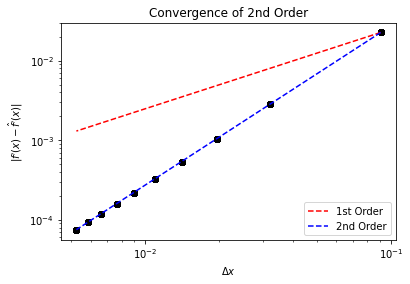

In [7]:
# YOUR CODE HERE
f = lambda x, y: -(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5)) * numpy.sin(3.0 * numpy.pi * x)
u_true = lambda x, y: (y - y**5) * numpy.sin(3.0 * numpy.pi * x)

#Creating our arrays 
m_range = numpy.arange(10, 200, 20)
delta_x = numpy.empty(m_range.shape)
error = numpy.empty((m_range.shape[0], 10))

#Calculating solutions & errors
for (i, m) in enumerate(m_range):
    
    x = numpy.linspace(0, 1, m + 2)
    delta_x[i] = (1 - 0) / (m + 1)

    # Compute solution
    x,y,U = solve_9point(m, f)
    X, Y = numpy.meshgrid(x, y)
    error[i] = numpy.linalg.norm((x[1] - x[0]) * (u_true(X, Y) - U), ord=1)
    
#Plotting    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error, 'ko')
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 2nd Order")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


plt.show()

**(d)** [15] Show that the 9-point Laplacian can be written as a 5-point Laplacian **plus** a finite difference approximation of $\frac{1}{6}h^2 u_{xxyy} + \mathcal O(h^4)$.

### Solution

9-point stencil is:
$$
\nabla^2 u_{ij} = \frac{1}{6 \Delta x^2} \left(4 u_{i-1,j} + 4 u_{i+1,j} + 4 u_{i,j-1} + 4 u_{i,j+1} + u_{i-1,j-1} + u_{i+1,j-1} + u_{i+1,j+1} + u_{i-1,j+1} -20 u_{i,j}  \right).
$$

Expanding using Taylor series gives us:

$$
\nabla^2 u(x_i,y_j) = \nabla^2 u + \frac{1}{12}\Delta x^2 (u_{xxxx} + 2u_{xxyy} + u_{yyyy}) + \mathcal{O}(\Delta x^4)
$$

5-point LTE is:
$$
    \tau_{ij} =  \frac{1}{12} \Delta x^2 (u_{xxxx} + u_{yyyy}) + \mathcal{O}(\Delta x^4).
$$

The difference between the 9-point and 5-point can then be expressed as:

$$
\left(\frac{1}{12}\Delta x^2 (u_{xxxx} + 2u_{xxyy} + u_{yyyy}) + \mathcal{O}(\Delta x^4)\right) - \left(\frac{1}{12} \Delta x^2 (u_{xxxx} + u_{yyyy}) + \mathcal{O}(\Delta x^4)\right)
$$

Which will simplifies to:

$$
\frac{1}{6}\Delta ^2 u_{xxyy} + \mathcal{O}(\Delta x^4)
$$

**(e)** [15] Modify your function to use the trick introduced in class that will cause the 9-point Laplacian stencil to become 4th order accurate.  Show that this is true via a convergence study.

In [8]:
# YOUR CODE HERE
def solve_9point_4thOrder(m, f):
    # YOUR CODE HERE
    
    #Discretization
    x = numpy.linspace(0, 1, m+2)
    y = numpy.linspace(0, 1, m+2)
    delx = 1.0 / (m + 1)
    
    #Calculation of 2nd derivatives
    d2f_x = lambda x, y: -7890.14*(y**5 - 0.225158*y**3 - y)*numpy.sin(9.42478*x)
    d2f_y = lambda x, y: y*(1776.53*y**2 - 120)*numpy.sin(9.42478*x)
    
    # Construct matrix
    e = numpy.ones(m**2)
    e1 = ([4] * (m-1) + [0]) * m
    e2 = ([1] * (m-1) + [0]) * m
    e3 = ([0] + [1] * (m-1)) * m
    e4 = ([0] + [4] * (m-1)) * m
    A = (sparse.spdiags([e2, 4.0*e, e3, e1, -20.0*e, e4, e2, 4.0*e, e3], [-m-1, -m, -m+1, -1, 0, 1, m-1, m, m+1], m**2, m**2)) / (6.0*delx**2)
    
    #Solve
    X, Y = numpy.meshgrid(x[1:-1], y[1:-1])
    f2 = f(X,Y) + (delx**2/12.0)*((d2f_x(X,Y) + d2f_y(X,Y)))
    U = numpy.zeros((m+2, m+2))
    U[1:-1, 1:-1] = linalg.spsolve(A, f2.reshape(m**2, order='F')).reshape((m, m), order='F')
    
    return x, y, U

/opt/conda/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


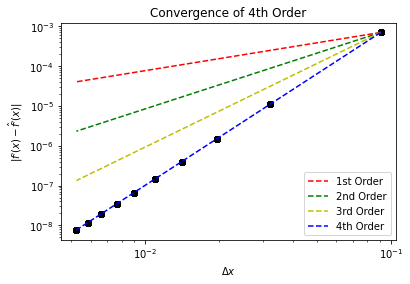

In [9]:
# YOUR CODE HERE
f = lambda x, y: -(20.0 * y**3 + 9.0 * numpy.pi**2 * (y - y**5)) * numpy.sin(3.0 * numpy.pi * x)
u_true = lambda x, y: (y - y**5) * numpy.sin(3.0 * numpy.pi * x)

#Creating our arrays 
m_range = numpy.arange(10, 200, 20)
delta_x = numpy.empty(m_range.shape)
error = numpy.empty((m_range.shape[0], 10))

#Calculating solutions & errors
for (i, m) in enumerate(m_range):
    
    x = numpy.linspace(0, 1, m + 2)
    delta_x[i] = (1 - 0) / (m + 1)

    # Compute solution
    x,y,U = solve_9point_4thOrder(m, f)
    X, Y = numpy.meshgrid(x, y)
    error[i] = numpy.linalg.norm((x[1] - x[0]) * (u_true(X, Y) - U), ord=1)
    
#Plotting    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error, 'ko')
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'g--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 3.0) * delta_x**3.0, 'y--', label="3rd Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 4.0) * delta_x**4.0, 'b--', label="4th Order")
axes.legend(loc=4)
axes.set_title("Convergence of 4th Order")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


plt.show()